In [2]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Step 1: Create an imbalanced binary classification dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=2, n_redundant=8, 
                           weights=[0.9, 0.1], flip_y=0, random_state=42)

np.unique(y, return_counts=True)

(array([0, 1]), array([900, 100], dtype=int64))

In [5]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [13]:
# Define the model hyperparameters
params = {
    "solver": "lbfgs",
    "max_iter": 1000,
    "multi_class": "auto",
    "random_state": 8888,
}

# Train the model
lr = LogisticRegression(**params)
lr.fit(X_train, y_train)

# Predict on the test set
y_pred = lr.predict(X_test)

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       270
           1       0.62      0.50      0.56        30

    accuracy                           0.92       300
   macro avg       0.79      0.73      0.76       300
weighted avg       0.91      0.92      0.92       300



In [15]:
report_dict = classification_report(y_test, y_pred, output_dict=True)
report_dict

{'0': {'precision': 0.9456521739130435,
  'recall': 0.9666666666666667,
  'f1-score': 0.956043956043956,
  'support': 270.0},
 '1': {'precision': 0.625,
  'recall': 0.5,
  'f1-score': 0.5555555555555556,
  'support': 30.0},
 'accuracy': 0.92,
 'macro avg': {'precision': 0.7853260869565217,
  'recall': 0.7333333333333334,
  'f1-score': 0.7557997557997558,
  'support': 300.0},
 'weighted avg': {'precision': 0.9135869565217392,
  'recall': 0.92,
  'f1-score': 0.915995115995116,
  'support': 300.0}}

In [7]:
import mlflow

In [23]:
mlflow.set_experiment("First Experiment")
mlflow.set_tracking_uri(uri="http://127.0.0.1:5000/")

with mlflow.start_run():
    mlflow.log_params(params)
    mlflow.log_metrics({
        'accuracy': report_dict['accuracy'],
        'recall_class_0': report_dict['0']['recall'],
        'recall_class_1': report_dict['1']['recall'],
        'f1_score_macro': report_dict['macro avg']['f1-score']
    })
    mlflow.sklearn.log_model(lr, "Logistic Regression")  

2024/07/29 13:57:02 INFO mlflow.tracking.fluent: Experiment with name 'First Experiment' does not exist. Creating a new experiment.
Registered model 'tracking-quickstart' already exists. Creating a new version of this model...
2024/07/29 13:57:04 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: tracking-quickstart, version 2
Created version '2' of model 'tracking-quickstart'.


Here’s a clear breakdown of the **classification report metrics**:

---

### ✅ **Per-Class Metrics**

#### **Class 0 (majority class)**:

```json
'0': {
  'precision': 0.9457,
  'recall': 0.9667,
  'f1-score': 0.9560,
  'support': 270.0
}
```

* **Precision**: 94.57% → Of all predicted class 0, \~94.57% were correct.
* **Recall**: 96.67% → Of all actual class 0, \~96.67% were correctly identified.
* **F1-score**: 95.60% → Harmonic mean of precision and recall.
* **Support**: 270 samples of class 0 in the test data.

---

#### **Class 1 (minority class)**:

```json
'1': {
  'precision': 0.625,
  'recall': 0.5,
  'f1-score': 0.5556,
  'support': 30.0
}
```

* **Precision**: 62.5% → Of all predicted class 1, only 62.5% were correct.
* **Recall**: 50% → Only 50% of actual class 1 were detected.
* **F1-score**: 55.56% → Low performance due to lower recall and small support.
* **Support**: 30 samples of class 1 in test data.

---

### ✅ **Overall Metrics**

#### **Accuracy**:

```json
'accuracy': 0.92
```

* **92% of total predictions were correct** (regardless of class balance).

---

### ✅ **Macro Average**:

```json
'macro avg': {
  'precision': 0.7853,
  'recall': 0.7333,
  'f1-score': 0.7558,
  'support': 300.0
}
```

* **Simple average across classes**, treating each class equally.
* Penalizes poor performance on minority class.

---

### ✅ **Weighted Average**:

```json
'weighted avg': {
  'precision': 0.9136,
  'recall': 0.92,
  'f1-score': 0.9160,
  'support': 300.0
}
```

* **Takes class imbalance into account** (weighted by support).
* Skewed toward class 0 because it has more samples.

---

### 🔍 Interpretation

* High overall accuracy (92%) hides the **poor recall on class 1**.
* Model is **biased toward class 0** (due to imbalance: 270 vs 30).
* **Consider using techniques like:**

  * Oversampling class 1 (SMOTE)
  * Class weights in model (`class_weight='balanced'`)
  * Different threshold tuning


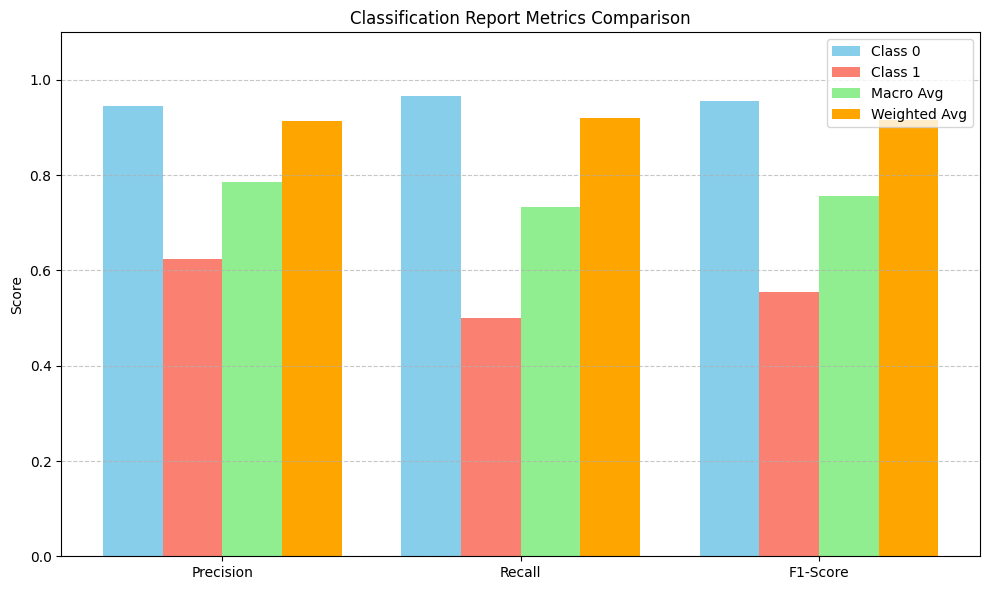

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Labels and values
labels = ['Precision', 'Recall', 'F1-Score']
class_0 = [0.9457, 0.9667, 0.9560]
class_1 = [0.6250, 0.5000, 0.5556]
macro_avg = [0.7853, 0.7333, 0.7558]
weighted_avg = [0.9136, 0.9200, 0.9160]

x = np.arange(len(labels))
width = 0.2

# Plot bars
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - 1.5*width, class_0, width, label='Class 0', color='skyblue')
ax.bar(x - 0.5*width, class_1, width, label='Class 1', color='salmon')
ax.bar(x + 0.5*width, macro_avg, width, label='Macro Avg', color='lightgreen')
ax.bar(x + 1.5*width, weighted_avg, width, label='Weighted Avg', color='orange')

# Labels and legends
ax.set_ylabel('Score')
ax.set_title('Classification Report Metrics Comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim([0, 1.1])
ax.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
